In [63]:
import itertools
import graphviz as gv

def calcularDistancia(coordenadas1, coordenadas2):
    diferenciaX = coordenadas1[0] - coordenadas2[0]
    diferenciaY = coordenadas1[1] - coordenadas2[1]

    distancia = (diferenciaX**2 + diferenciaY**2)**0.5

    return distancia

def visualizarGrafo(faroles, uniones):
    g = gv.Graph("G")
    g.graph_attr["layout"] = "neato"
    g.edge_attr["color"] = "gray"
    g.node_attr["color"] = "orangered"
    g.node_attr["width"] = "0.1"
    g.node_attr["height"] = "0.1"
    g.node_attr["fontsize"] = "8"
    g.node_attr["fontcolor"] = "mediumslateblue"
    g.node_attr["fontname"] = "monospace"
    g.edge_attr["fontsize"] = "7"
    g.edge_attr["fontname"] = "monospace"

    for farol, coordenadas in faroles.items():
        g.node(str(farol), label=str(farol))

    added = set()

    for u, v in uniones:
        distancia = calcularDistancia(faroles[u], faroles[v])
        if f"{u},{v}" not in added:
            added.add(f"{u},{v}")
            added.add(f"{v},{u}")
            g.edge(str(u), str(v), label=f"{distancia:.2f}")

    return g

def calcularCableTotal(faroles, uniones):
    cableTotal = 0
    added = set()

    for u, v in uniones:
        distancia = calcularDistancia(faroles[u], faroles[v])
        if f"{u},{v}" not in added:
            added.add(f"{u},{v}")
            added.add(f"{v},{u}")
            cableTotal += distancia

    return cableTotal


def obtenerMSTPorPrim(graph, start_node):
    numNodos = len(graph)
    mst = []
    visitados = [False] * numNodos
    cola_prioridad = [(0, start_node, None)]

    while cola_prioridad:
        peso, nodo_actual, nodo_anterior = cola_prioridad.pop(0)

        if not visitados[nodo_actual]:
            visitados[nodo_actual] = True
            if nodo_anterior is not None:
                mst.append((nodo_anterior, nodo_actual, peso))

            for vecino, peso_vecino in graph[nodo_actual]:
                if not visitados[vecino]:
                    cola_prioridad.append((peso_vecino, vecino, nodo_actual))

            cola_prioridad.sort()

    return mst

def generarPropuesta(faroles):
    grafo_completo = {i: [] for i in faroles.keys()}

    for (u, v) in itertools.combinations(faroles.keys(), 2):
        distancia = calcularDistancia(faroles[u], faroles[v])
        # la conexión entre faroles no debe superar 4
        if distancia <= 4:
            grafo_completo[u].append((v, distancia))
            grafo_completo[v].append((u, distancia))

    # calcular el mst con prim
    mst = obtenerMSTPorPrim(grafo_completo, start_node=0)

    propuesta = [(u, v) for u, v, peso in mst]

    return propuesta

def visualizarMST(faroles, mst):
    g = gv.Graph("G")
    g.graph_attr["layout"] = "neato"
    g.edge_attr["color"] = "purple"
    g.node_attr["color"] = "orangered"
    g.node_attr["width"] = "0.1"
    g.node_attr["height"] = "0.1"
    g.node_attr["fontsize"] = "8"
    g.node_attr["fontcolor"] = "mediumslateblue"
    g.node_attr["fontname"] = "monospace"
    g.edge_attr["fontsize"] = "7"
    g.edge_attr["fontname"] = "monospace"

    for farol, coordenadas in faroles.items():
        g.node(str(farol), label=str(farol))

    for edge in mst:
        if len(edge) == 3:  # verficar si el mst tiene 3 elementos (origen, destino, peso)
            u, v, peso = edge
        else:
            u, v = edge
            peso = calcularDistancia(faroles[u], faroles[v])
        distancia = calcularDistancia(faroles[u], faroles[v])
        g.edge(str(u), str(v), label=f"{distancia:.2f}")

    return g

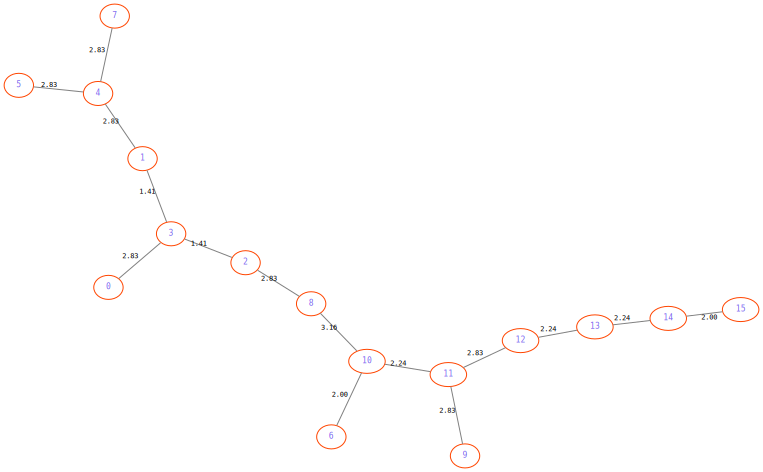

In [64]:
faroles = {
    0: (0, 0),
    1: (1, 3),
    2: (3, 1),
    3: (2, 2),
    4: (3, 5),
    5: (1, 7),
    6: (8, 6),
    7: (5, 7),
    8: (5, 3),
    9: (8, 1),
    10: (8, 4),
    11: (10, 3),
    12: (12, 1),
    13: (13, 3),
    14: (12, 5),
    15: (12, 7)
}

uniones = [
    (0, 3), (1, 3), (1, 4), (2, 3), (2, 8), (3, 0), (3, 1), (3, 2), (4, 1),
    (4, 5), (4, 7), (5, 4), (6, 10), (7, 4), (8, 2), (8, 10), (9, 11), (10, 6),
    (10, 8), (10, 11), (11, 9), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12),
    (13, 14), (14, 13), (14, 15)
]

visualizarGrafo(faroles, uniones)

In [65]:
graph = {i: [] for i in range(len(faroles))}

for u, v in uniones:
    distancia = calcularDistancia(faroles[u], faroles[v])
    graph[u].append((v, distancia))
    graph[v].append((u, distancia))

cable_inicial = calcularCableTotal(faroles, uniones)
print(f"El cable utilizado en la propuesta inicial: {cable_inicial}")

El cable utilizado en la propuesta inicial: 36.49789859063728


Longitud total del cable en la nueva propuesta: 36.49789859063728


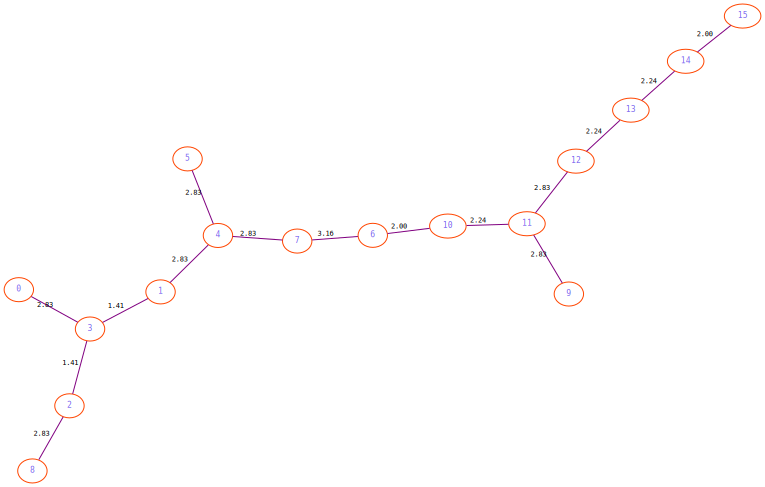

In [66]:
# Generar una nueva propuesta
nueva_propuesta = generarPropuesta(faroles)

cable_mst = sum(calcularDistancia(faroles[u], faroles[v]) for u, v in nueva_propuesta)
print("Longitud total del cable en la nueva propuesta:", cable_mst)
visualizarMST(faroles, nueva_propuesta)


### *Justificación*

La elección del algoritmo de Prim en la solución se fundamenta en la búsqueda del tamaño mínimo para interconectar los faroles, considerando un punto de partida establecido. La implementación de este algoritmo permitió encontrar una nueva red de interconexión de faroles a partir de una coordenada inicial, y los resultados evidencian que la distancia mínima en esta nueva propuesta coincide con la presentada por el ingeniero en la propuesta inicial. Este respaldo de la distancia mínima obtenida valida la eficacia del algoritmo de Prim en la minimización del cable necesario para interconectar los faroles, cumpliendo así con los requisitos de T-ALUMBRA y proporcionando otra alternativa de solución óptima de red al problema planteado.






